In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset1/master/abalone.csv')
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [3]:
df.tail()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10
4176,M,0.710,0.555,0.195,1.9485,0.9455,0.3765,0.4950,12


In [4]:
df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [6]:
df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


To get df['Age'], add +1.5 to rings

In [7]:
df['Age'] = df['Rings']+1.5
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Age
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,16.5
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,8.5
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,10.5
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,11.5
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,8.5


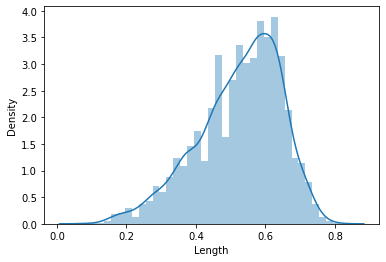

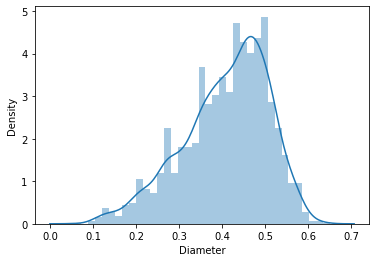

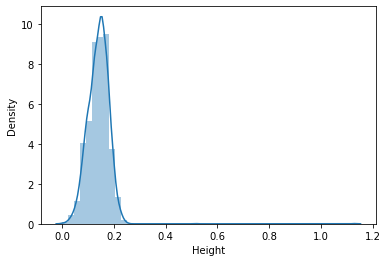

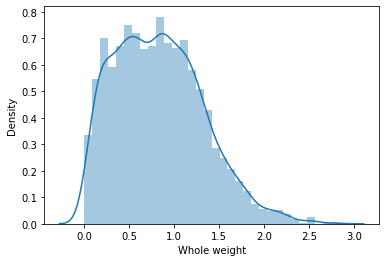

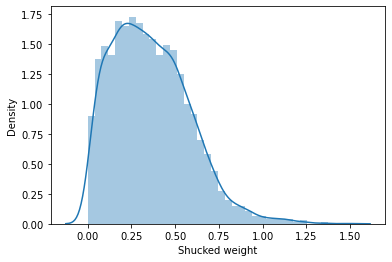

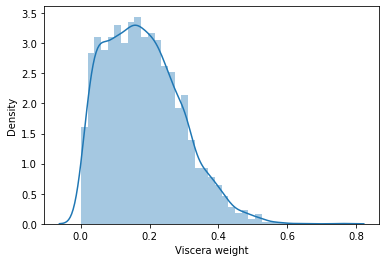

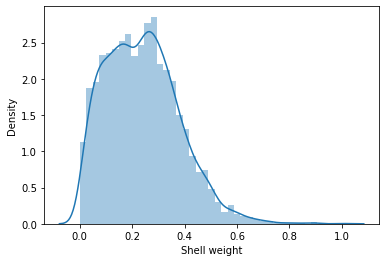

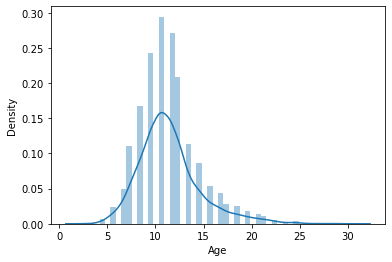

In [8]:
columns = ['Length','Diameter','Height','Whole weight','Shucked weight','Viscera weight','Shell weight','Age']
for i in columns:
    sns.distplot(df[i])
    plt.show()

In the above distribution plots we observe that most of the data is skewed

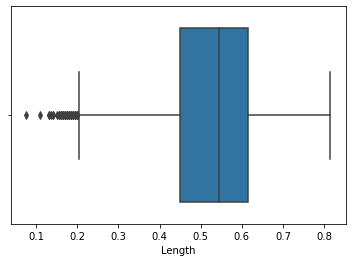

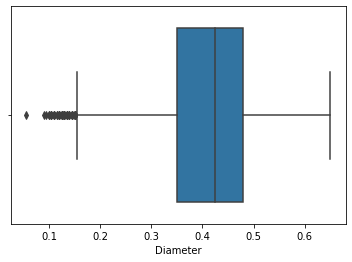

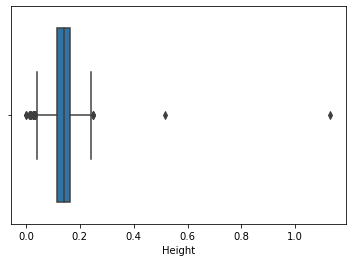

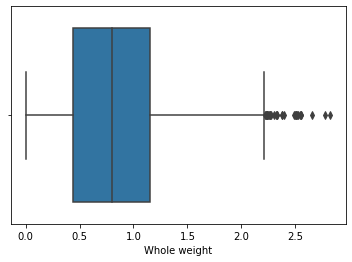

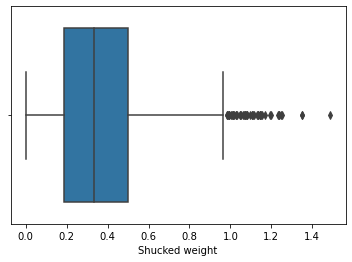

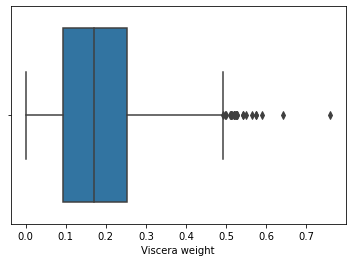

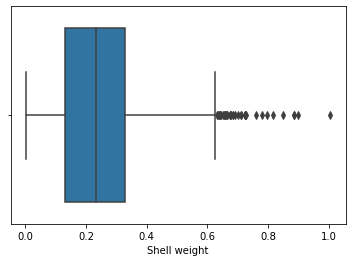

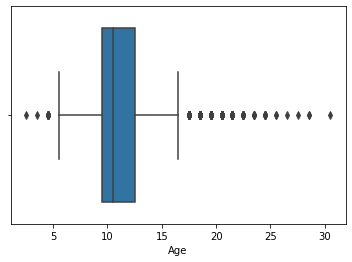

In [9]:
for i in columns:
    sns.boxplot(df[i])
    plt.show()

In the above box plots, we observe that most of the features have outliers

In [10]:
df1=df[['Length','Diameter','Height','Whole weight','Shucked weight','Viscera weight','Shell weight','Age']]

<AxesSubplot:>

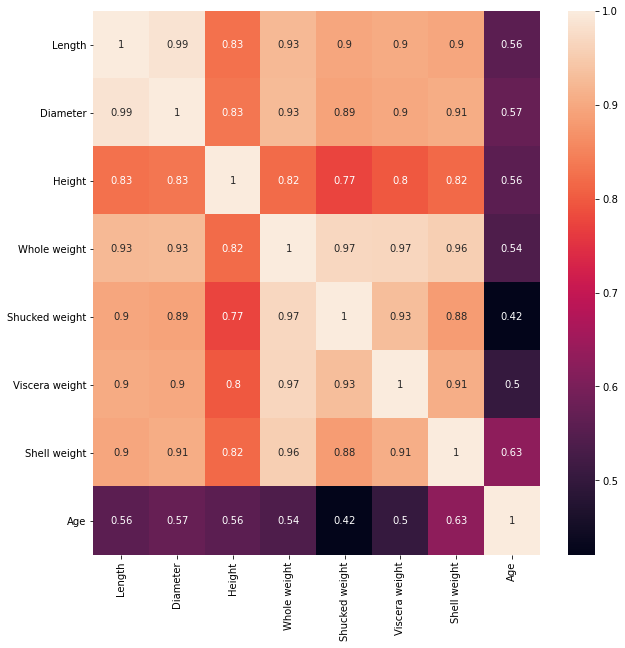

In [11]:
plt.figure(figsize=(10,10))
corr=df1.corr()
sns.heatmap(corr,annot=True)

We observe thatWhole Weight, Shucked Weight, Viscera Weight, Shell Weight have high correlation\
Age has the highest correlation with Shell Weight and the least correlation with Shucked Weight

We need to convert the categorical data to numerical data in the "Sex" feature

In [12]:
df['Sex'].unique()

array(['M', 'F', 'I'], dtype=object)

In [13]:
df['Sex'].value_counts()

M    1528
I    1342
F    1307
Name: Sex, dtype: int64

Let us now use the Ordinal Encoder to convert the ategorical data to numerical data

In [14]:
from sklearn.preprocessing import OrdinalEncoder

In [15]:
ord=OrdinalEncoder()

In [16]:
df['Sex']=ord.fit_transform(df[['Sex']])

In [17]:
df['Sex'].unique() # 2 - Male, 0 -Female, 1 - Infant

array([2., 0., 1.])

In [18]:
df['Sex'].value_counts()

2.0    1528
1.0    1342
0.0    1307
Name: Sex, dtype: int64

In [19]:
df['Age'].value_counts()

10.5    689
11.5    634
9.5     568
12.5    487
8.5     391
13.5    267
7.5     259
14.5    203
15.5    126
6.5     115
16.5    103
17.5     67
18.5     58
5.5      57
19.5     42
20.5     32
21.5     26
4.5      15
22.5     14
24.5      9
23.5      6
25.5      2
28.5      2
3.5       1
30.5      1
2.5       1
27.5      1
26.5      1
Name: Age, dtype: int64

In [20]:
from scipy.stats import zscore
z=np.abs(zscore(df))
z

array([[1.15198011, 0.57455813, 0.43214879, ..., 0.63821689, 1.57154357,
        1.57154357],
       [1.15198011, 1.44898585, 1.439929  , ..., 1.21298732, 0.91001299,
        0.91001299],
       [1.28068972, 0.05003309, 0.12213032, ..., 0.20713907, 0.28962385,
        0.28962385],
       ...,
       [1.15198011, 0.6329849 , 0.67640943, ..., 0.49695471, 0.28962385,
        0.28962385],
       [1.28068972, 0.84118198, 0.77718745, ..., 0.41073914, 0.02057072,
        0.02057072],
       [1.15198011, 1.54905203, 1.48263359, ..., 1.84048058, 0.64095986,
        0.64095986]])

In [21]:
df_new=df[(z<3).all(axis=1)]

In [22]:
print(df.shape)
print(df_new.shape)

(4177, 10)
(4027, 10)


In [23]:
100-((4027/4177)*100)

3.5910940866650662

In [24]:
4177-4027

150

After removing outliers we are losing about 3.59% data(150 rows)

In [25]:
x=df.drop(columns='Age')
y=df['Age']

In [26]:
x.skew()

Sex              -0.098155
Length           -0.639873
Diameter         -0.609198
Height            3.128817
Whole weight      0.530959
Shucked weight    0.719098
Viscera weight    0.591852
Shell weight      0.620927
Rings             1.114102
dtype: float64

The feature length, diameter, height, shucked weight still has some skew data

In [27]:
x['Length'] = np.square(x['Length'])
x['Diameter'] = np.square(x['Diameter'])

In [28]:
x.skew()

Sex              -0.098155
Length           -0.068660
Diameter         -0.026554
Height            3.128817
Whole weight      0.530959
Shucked weight    0.719098
Viscera weight    0.591852
Shell weight      0.620927
Rings             1.114102
dtype: float64

In [29]:
x['Shucked weight']=np.sqrt(x['Shucked weight'])
x['Height']=np.sqrt(x['Height'])

In [30]:
x.skew()

Sex              -0.098155
Length           -0.068660
Diameter         -0.026554
Height           -0.295641
Whole weight      0.530959
Shucked weight   -0.141443
Viscera weight    0.591852
Shell weight      0.620927
Rings             1.114102
dtype: float64

array([[<AxesSubplot:title={'center':'Sex'}>,
        <AxesSubplot:title={'center':'Length'}>,
        <AxesSubplot:title={'center':'Diameter'}>],
       [<AxesSubplot:title={'center':'Height'}>,
        <AxesSubplot:title={'center':'Whole weight'}>,
        <AxesSubplot:title={'center':'Shucked weight'}>],
       [<AxesSubplot:title={'center':'Viscera weight'}>,
        <AxesSubplot:title={'center':'Shell weight'}>,
        <AxesSubplot:title={'center':'Rings'}>]], dtype=object)

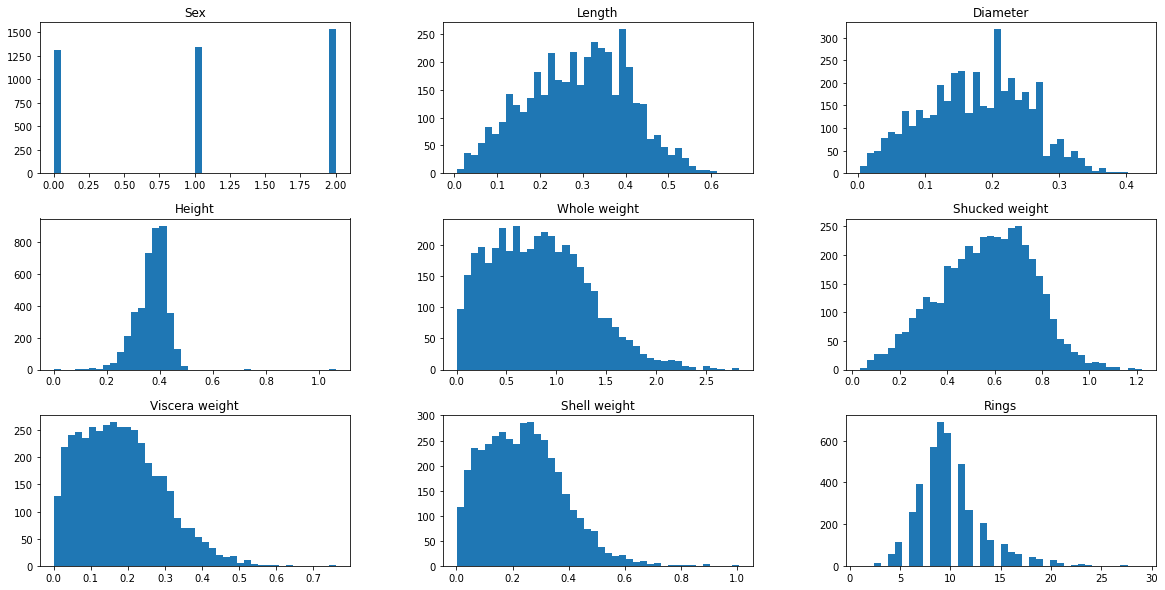

In [31]:
x.hist(figsize=(20,10), grid=False, bins = 40)

In [32]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc_x=sc.fit_transform(x)

In [33]:
sc_x

array([[ 1.15198011, -0.69410371, -0.56588297, ..., -0.72621157,
        -0.63821689,  1.57154357],
       [ 1.15198011, -1.40991617, -1.39519277, ..., -1.20522124,
        -1.21298732, -0.91001299],
       [-1.28068972, -0.06848236,  0.00245751, ..., -0.35668983,
        -0.20713907, -0.28962385],
       ...,
       [ 1.15198011,  0.60138768,  0.65043806, ...,  0.97541324,
         0.49695471, -0.28962385],
       [-1.28068972,  0.86074002,  0.77680907, ...,  0.73362741,
         0.41073914,  0.02057072],
       [ 1.15198011,  1.82171983,  1.73512261, ...,  1.78744868,
         1.84048058,  0.64095986]])

In [34]:
x=sc_x

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [36]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=11)

In [38]:
lr=LinearRegression()
lr.fit(x_train,y_train)
pred_train=lr.predict(x_train)
pred_test=lr.predict(x_test)
train_score=r2_score(y_train,pred_train)
test_score=r2_score(y_test,pred_test)
print('The training accuracy of LinearRegression is', train_score)
print('The test accuracy of LinearRegression is', test_score)

The training accuracy of LinearRegression is 1.0
The test accuracy of LinearRegression is 1.0


In [40]:
from sklearn.svm import SVR
sv=SVR(kernel='rbf')
sv.fit(x_train,y_train)
pred_train=sv.predict(x_train)
pred_test=sv.predict(x_test)
train_score=r2_score(y_train,pred_train)
test_score=r2_score(y_test,pred_test)
print('The training accuracy of SVR is', train_score)
print('The test accuracy of SVR is', test_score)

The training accuracy of SVR is 0.9876243843950042
The test accuracy of SVR is 0.9910366510609625


In [41]:
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor()
dt.fit(x_train,y_train)
pred_train=dt.predict(x_train)
pred_test=dt.predict(x_test)
train_score=r2_score(y_train,pred_train)
test_score=r2_score(y_test,pred_test)
print('The training accuracy of DT is', train_score)
print('The test accuracy of DT is', test_score)

The training accuracy of DT is 1.0
The test accuracy of DT is 0.9998888379470018
